In [2]:
pip install elapid # Install the elapid library using pip [Series of Species Distribution Modeling Tools for python which includes Implementation of Maxent Model with biogeography data]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.2 MB/s eta 0:00:00


In [3]:
pip install geopandas # Install the geopandas library using pip [We can use it to work with geospatial data]

In [4]:
pip install rasterio # Install the rasterio library using pip [We can use it to read and manipulate raster datasets]

In [5]:
import matplotlib.pyplot as plt # For Data Visualization
import rasterio as rio # for Geospatial Raster Data
import geopandas as gpd # for Geospatial Data, specifically Vector Data
import pandas as pd  # For Data Manipulation and Analysis Tool
import elapid as ela  # Species Distribution Modeling Tools
import rasterio.plot as rioplot # To Visualize Raster Data
import warnings # To Ignore all the Warning Messages
import os # To Load the Datasets/Files from the Specified Directory
import re # For Patterns, i.e., used to match and manipulate strings
from sklearn import metrics # For Evaluation Metrics (To assess the performance)

In [6]:
# PLot Preferences
plt.style.use('ggplot')

# Ignore the Warning Messages
warnings.filterwarnings("ignore")

# Define the color for barplots
pair_colors = ['#FFCC02', '#00458C']

In [7]:

# Mount Google Drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

# After mounting Google Drive, we can access files and directories within it

Mounted at /content/drive


In [8]:
# background data or raster
bio_clim='/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/'
#os path join to read background data
bioclimate_variables=[os.path.join(bio_clim,f) for f in os.listdir(bio_clim) if f.endswith(".tif")]
#bioclimate_variables

In [9]:
# Function to extract the Bioclimatic Variable Number from the path

def extract_number(path):
    # Extract the number using regular expression
    match = re.search(r'Bio_(\d+)', path)
    if match:
        return int(match.group(1))
    return 0

# Sort the paths based on the extracted number
sorted_paths = sorted(bioclimate_variables, key=extract_number)

# Print the sorted paths
for bioclimate_variables in sorted_paths:
    print(bioclimate_variables)

# Save the sorted paths in a list
bioclimate_variables = list(sorted_paths)

/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_1_Annual_mean_Temperature_Chelsa(2011-2040).tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_2_Mean_Diurnal_Range_Chelsa(2011-2040).tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_3_Isothermality_Chelsa(2011-2040).tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_4_Temperature_Seasonality_Chelsa(2011-2040).tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa(2011-2040).tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa(2011-2040).tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_7_Temperature_Annual_R

In [10]:
# Add the Labels for Map
# Read the file path and split them, since we need only bioclim variables names

labels = []  # Initialize labels as an empty list
for i in bioclimate_variables:
    filename = os.path.basename(i)
    filename_without_extension = os.path.splitext(filename)[0]
    labels.append(filename_without_extension)
print(labels)

['cropped_Bio_1_Annual_mean_Temperature_Chelsa(2011-2040)', 'cropped_Bio_2_Mean_Diurnal_Range_Chelsa(2011-2040)', 'cropped_Bio_3_Isothermality_Chelsa(2011-2040)', 'cropped_Bio_4_Temperature_Seasonality_Chelsa(2011-2040)', 'cropped_Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa(2011-2040)', 'cropped_Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa(2011-2040)', 'cropped_Bio_7_Temperature_Annual_Range_Chelsa(2011-2040)', 'cropped_Bio_8_Mean_Temperature_of_Wettest_Quarter_Chelsa(2011-2040)', 'cropped_Bio_9_Mean_Temperature_of_Driest_Quarter_Chelsa(2011-2040)', 'cropped_Bio_10_Mean_Temperature_of_Warmest_Quarter_Chelsa(2011-2040)', 'cropped_Bio_11_Mean_Temperature_of_Coldest_Quarter_Chelsa(2011-2040)', 'cropped_Bio_12_Annual_Precipitation_Chelsa(2011-2040)', 'cropped_Bio_13_Precipitation_of_Wettest_Month_Chelsa(2011-2040)', 'cropped_Bio_14_Precipitation_of_Driest_Month_Chelsa(2011-2040)', 'cropped_Bio_15_Precipitation_of_Seasonality_Chelsa(2011-2040)', 'cropped_Bio_16_Precipitation_of_W

In [11]:
# Reading Bug Data (Species Data), also called as Presence data in the Geopackage File Format

# read the presence data, draw background point samples
bug_Presence_data = gpd.read_file('/content/drive/MyDrive/Project_2/Insect Pest/Species Data/EDD Maps site/Large_Lady_Beetle(1995-2023).gpkg')

In [12]:
# Convert the 'ObsDate' column to datetime format
bug_Presence_data['ObsDate'] = pd.to_datetime(bug_Presence_data['ObsDate'])

# Filter the data for the years 2011 to 2022
presence = bug_Presence_data[(bug_Presence_data['ObsDate'].dt.year >= 2010) & (bug_Presence_data['ObsDate'].dt.year <= 2023)]
presence.head()


SciName    ObsDate  Latitude  Longitude  \
0  Harmonia axyridis 2017-05-28  30.44935  -83.91289   
1  Harmonia axyridis 2011-04-04  36.97516 -122.00523   
2  Harmonia axyridis 2011-06-28  34.14359 -118.39523   
3  Harmonia axyridis 2011-08-14  38.61315 -122.78149   
4  Harmonia axyridis 2012-02-08  37.37643  -88.92970   

                      geometry  
0   POINT (-83.91289 30.44935)  
1  POINT (-122.00523 36.97516)  
2  POINT (-118.39523 34.14359)  
3  POINT (-122.78149 38.61315)  
4   POINT (-88.92970 37.37643)

# Bio_1_Annual_mean_Temperature_Chelsa_2011_2040

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[0], count=10_000)
background.head()

0    POINT (-100.35417 42.95417)
1     POINT (-94.09583 34.69583)
2     POINT (-90.60417 31.74583)
3    POINT (-102.47917 30.05417)
4    POINT (-100.96250 46.54583)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

geometry  class   b01  b02  b03   b04   b05   b06  b07  \
0   POINT (-83.91289 30.44935)      1  2934  104    4  5878  3057  2804  253   
1  POINT (-122.00523 36.97516)      1  2871   38    4  1680  2922  2831   91   
2  POINT (-118.39523 34.14359)      1  2917  130    5  4253  3055  2805  250   
3  POINT (-122.78149 38.61315)      1  2897  136    4  5045  3062  2783  279   
4   POINT (-88.92970 37.37643)      1  2887  100    3  8565  3056  2729  327   

    b08  ...   b10   b11    b12   b13  b14  b15   b16   b17   b18   b19  
0  3004  ...  3004  2853  16501  2029  685  333  5967  2920  5967  3261  
1  2853  ...  2895  2853   7747  1784   12  927  4280    81   603  4280  
2  2863  ...  2975  2863   4485   926    7  954  2632    44    77  2632  
3  2833  ...  2961  2833  11856  2913    4  949  6841   102   116  6841  
4  2938  ...  2995  2770  13020  1325  777  160  3674  2455  3188  3333  

[5 rows x 21 columns]

In [ ]:
# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model1c.ela')

Training AUC score: 0.906


In [ ]:
# Write the model predictions to disk
output_raster1 = 'Annual_mean_Temperature_Chelsa_Prediction_2011-2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster1, quiet=True)

# and read into memory
with rio.open(output_raster1, 'r') as src:
    pred = src.read(1, masked=True)

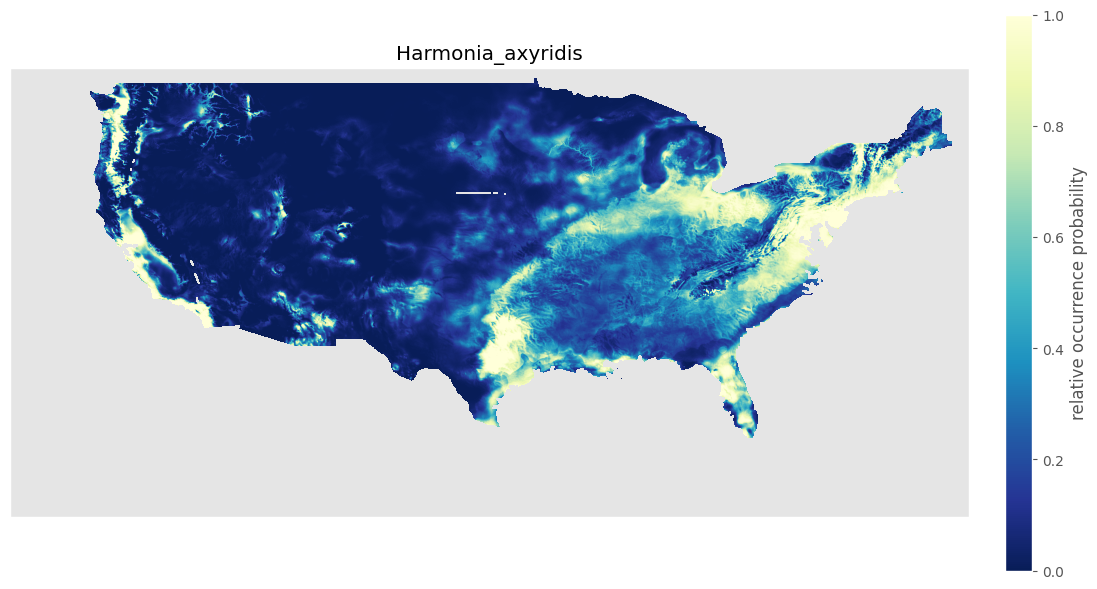

In [ ]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot1 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar1 = plt.colorbar(plot1, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file1 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Annual_mean_Temperature_Chelsa_Prediction_2011-2040.tif'
cbar1.ax.figure.savefig(colorbar_file1, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_2_Mean_Diurnal_Range_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[1], count=10_000)
background.head()

0     POINT (-92.65417 36.47083)
1    POINT (-111.22917 47.82083)
2     POINT (-75.34583 42.42083)
3     POINT (-84.92083 41.58750)
4    POINT (-112.01250 37.27917)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.908


In [ ]:
# Save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model2c.ela')

# Write the model predictions to disk
output_raster2 = 'Mean_Diurnal_Range_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster2, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster2, 'r') as src:
    pred = src.read(1, masked=True)

In [ ]:
# Plot the Suitability Predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot2 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar2 = plt.colorbar(plot2, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file2 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Mean_Diurnal_Range_Chelsa_Prediction_2011_2040.tif'
cbar2.ax.figure.savefig(colorbar_file2, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_3_Isothermality_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[2], count=10_000)
background.head()

0    POINT (-101.23750 44.41250)
1     POINT (-74.94583 22.83750)
2     POINT (-77.82917 36.06250)
3     POINT (-74.95417 29.83750)
4     POINT (-90.34583 23.73750)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.908


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model3c.ela')

# Write the model predictions to disk
output_raster3 = 'Isothermality_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster3, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster3, 'r') as src:
    pred = src.read(1, masked=True)

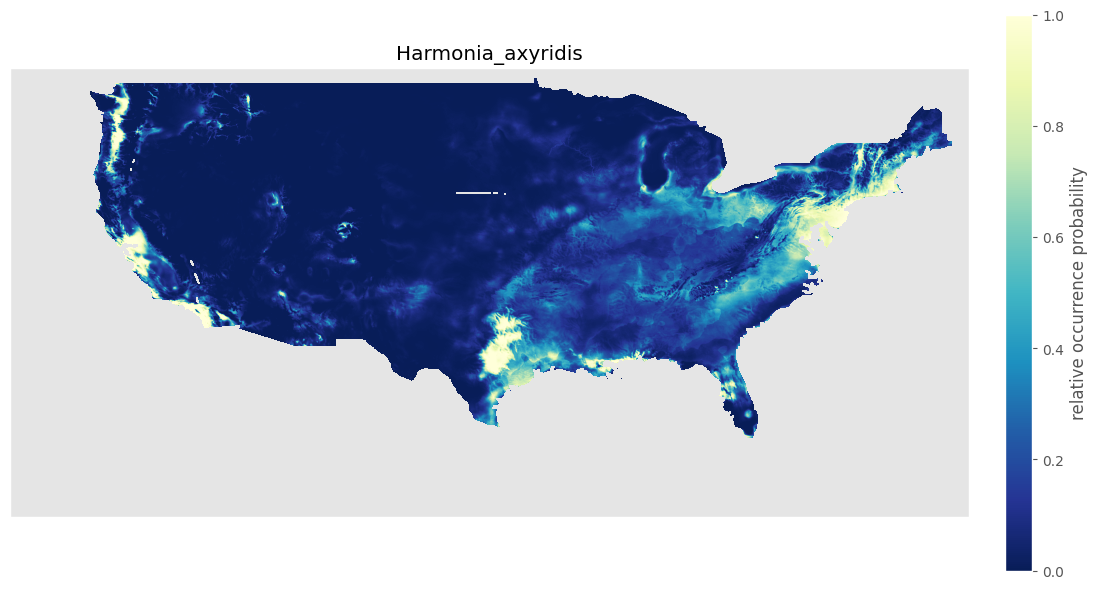

In [ ]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot3 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar3 = plt.colorbar(plot3, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file3 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Isothermality_Chelsa_Prediction_2011_2040.tif'
cbar3.ax.figure.savefig(colorbar_file3, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_4_Temperature_Seasonality_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[3], count=10_000)
background.head()

0    POINT (-109.36250 38.58750)
1     POINT (-96.25417 40.87917)
2     POINT (-92.62083 47.95417)
3    POINT (-110.07917 45.14583)
4    POINT (-120.22083 41.24583)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.908


In [ ]:
# Save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model4c.ela')

# Write the model predictions to disk
output_raster4 = 'Temperature_Seasonality_Chelsa_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster4, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster4, 'r') as src:
    pred = src.read(1, masked=True)


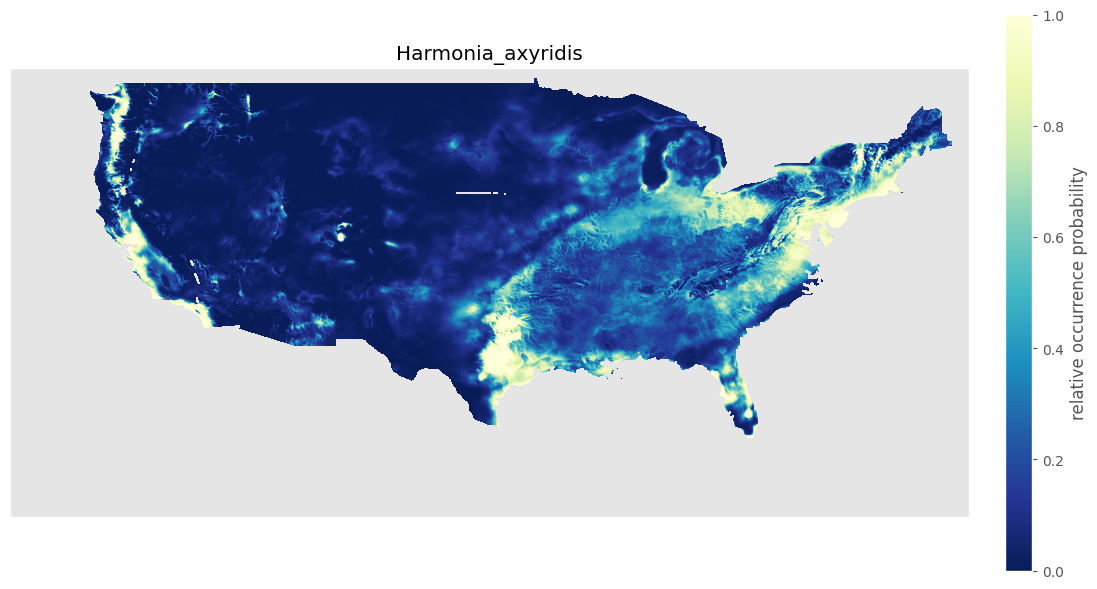

In [ ]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot4 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar4 = plt.colorbar(plot4, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file4 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Temperature_Seasonality_Chelsa_2011_2040.tif'
cbar4.ax.figure.savefig(colorbar_file4, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[4], count=10_000)
background.head()

0    POINT (-103.21250 30.35417)
1    POINT (-122.91250 48.87917)
2     POINT (-94.67083 37.18750)
3    POINT (-110.18750 31.37083)
4    POINT (-119.67917 36.72083)
dtype: geometry

In [ ]:
# Merge Datasets and Read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.906


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model5c.ela')

#Write the model predictions to disk
output_raster5 = 'Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster5, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster5, 'r') as src:
    pred = src.read(1, masked=True)


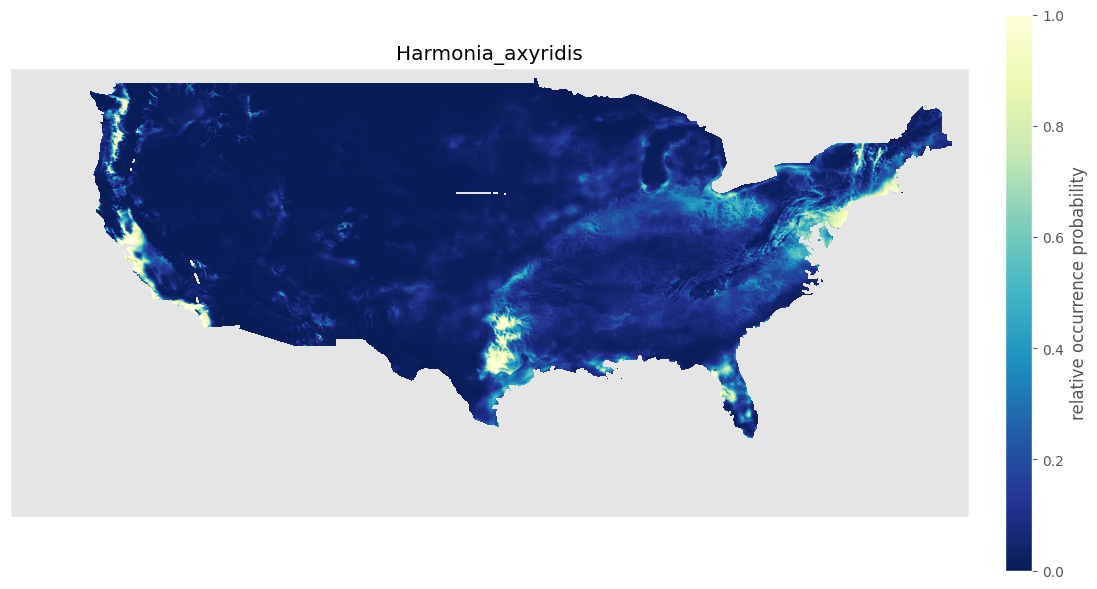

In [ ]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot5 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar5 = plt.colorbar(plot5, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file5 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_2011_2040.tif'
cbar5.ax.figure.savefig(colorbar_file5, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_2011_2040.tif


In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[5], count=10_000)
background.head()

0    POINT (-96.88750 43.81250)
1    POINT (-89.70417 32.31250)
2    POINT (-91.16250 39.81250)
3    POINT (-80.86250 32.85417)
4    POINT (-91.07083 36.38750)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.907


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model6c.ela')

# Write the model predictions to disk
output_raster6 = 'Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster6, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster6, 'r') as src:
    pred = src.read(1, masked=True)


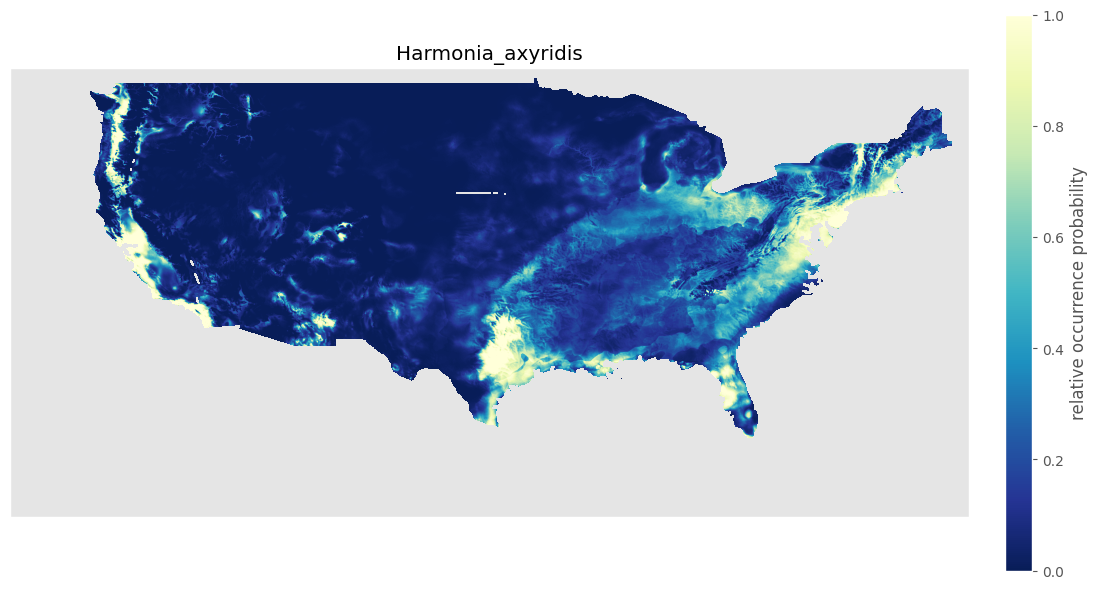

In [ ]:
 # Plot the Suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot6 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar6 = plt.colorbar(plot6, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file6= '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_2011_2040.tif'
cbar6.ax.figure.savefig(colorbar_file6, format='tiff')

# Close the figure to free up memory
plt.close(fig)

In [ ]:
#Bio_7_Temperature_Annual_Range_Chelsa_2011_2040

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[6], count=10_000)
background.head()

0     POINT (-79.12917 37.51250)
1    POINT (-110.77917 37.90417)
2     POINT (-90.33750 37.24583)
3     POINT (-95.17917 43.12917)
4    POINT (-102.46250 33.49583)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.908


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model7c.ela')

# Write the model predictions to disk
output_raster7 = 'Temperature_Annual_Range_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster7, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster7, 'r') as src:
    pred = src.read(1, masked=True)


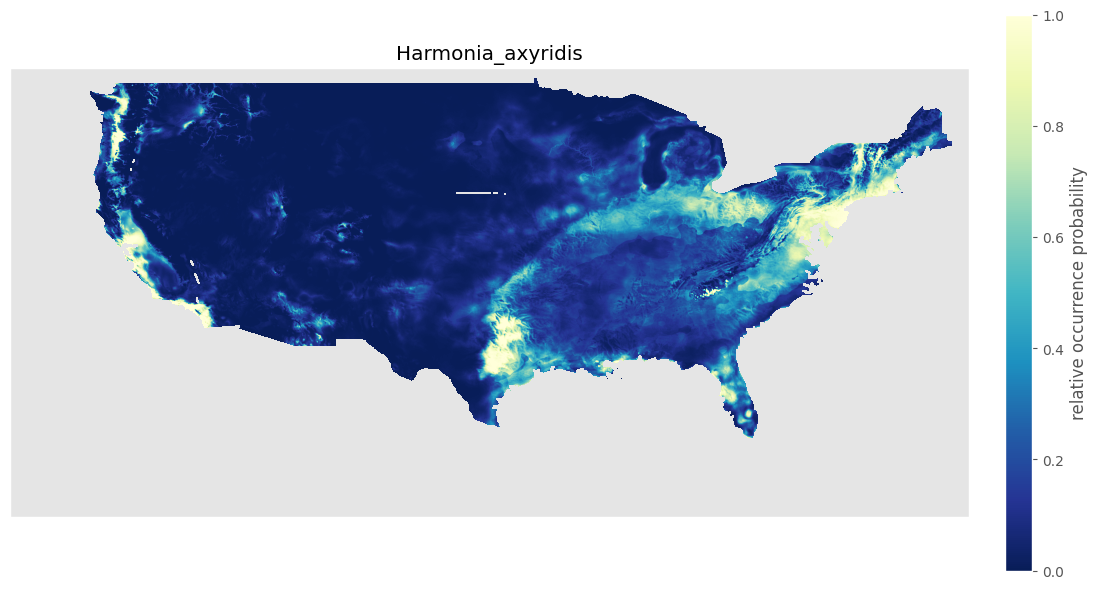

In [ ]:

# Plot the Suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot7 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar7 = plt.colorbar(plot7, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file7 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Temperature_Annual_Range_Chelsa_Prediction_2011_2040.tif'
cbar7.ax.figure.savefig(colorbar_file7, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_8_Mean_Temperature_of_Wettest_Quarter_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[7], count=10_000)
background.head()

0     POINT (-70.56250 25.47083)
1    POINT (-114.57917 28.36250)
2    POINT (-110.01250 23.09583)
3     POINT (-70.46250 34.67083)
4     POINT (-85.12917 45.30417)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.916


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model8c.ela')

# Write the model predictions to disk
output_raster8 = 'Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster8, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster8, 'r') as src:
    pred = src.read(1, masked=True)


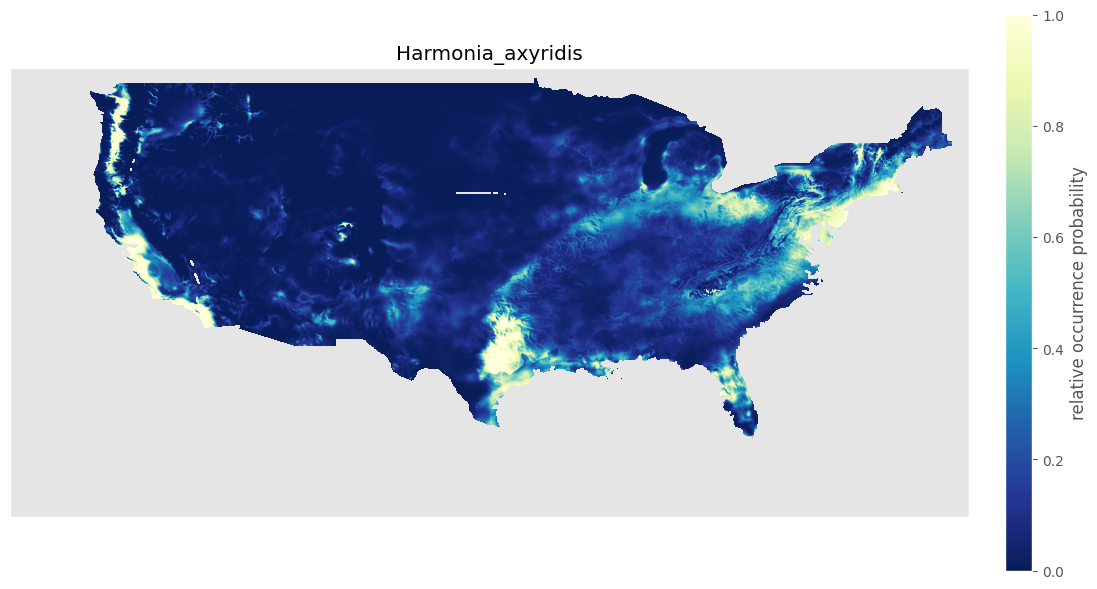

In [ ]:
   # Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot8 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar8 = plt.colorbar(plot8, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file1 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar1.ax.figure.savefig(colorbar_file1, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_9_Mean_Temperature_of_Driest_Quarter_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[8], count=10_000)
background.head()

0     POINT (-68.64583 46.02917)
1     POINT (-78.82083 41.66250)
2    POINT (-123.42917 43.14583)
3     POINT (-96.20417 20.52083)
4     POINT (-80.42083 49.74583)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.910


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model9c.ela')

# Write the model predictions to disk
output_raster9 = 'Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster9, quiet=True)

# Read into memory
with rio.open(output_raster9, 'r') as src:
    pred = src.read(1, masked=True)


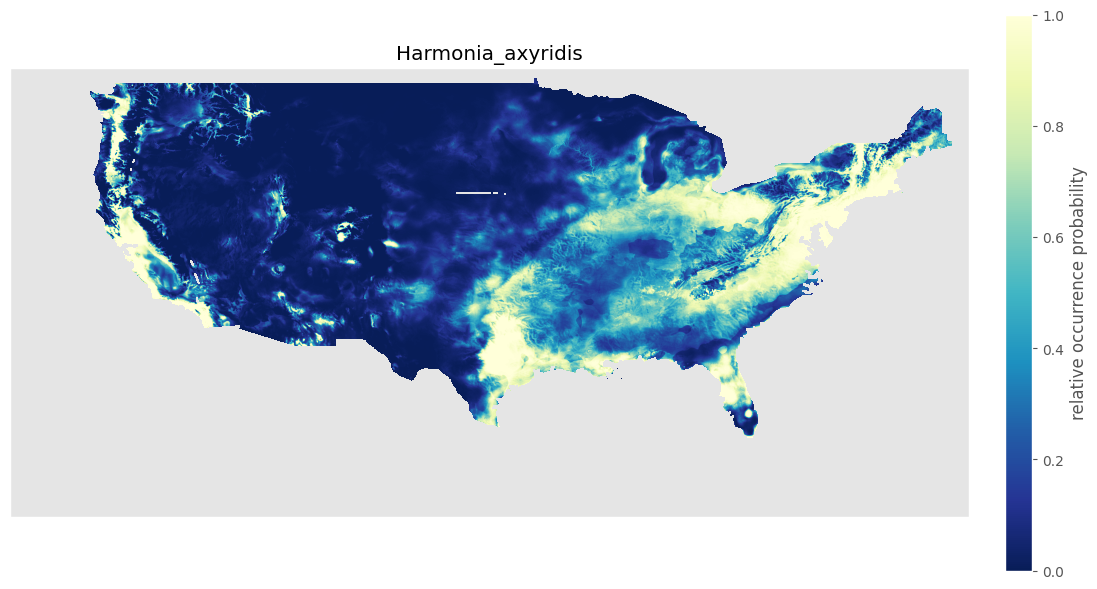

In [ ]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot9 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar9 = plt.colorbar(plot9, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file9 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar9.ax.figure.savefig(colorbar_file9, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_10_Mean_Temperature_of_Warmest_Quarter_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[9], count=10_000)
background.head()

0     POINT (-85.87083 23.20417)
1    POINT (-120.40417 48.27083)
2     POINT (-80.43750 44.07917)
3    POINT (-103.13750 41.12083)
4     POINT (-80.68750 21.22083)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.915


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model10c.ela')

# Write the model predictions to disk
output_raster10 = 'Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster10, quiet=True)

# Read into memory
with rio.open(output_raster10, 'r') as src:
    pred = src.read(1, masked=True)


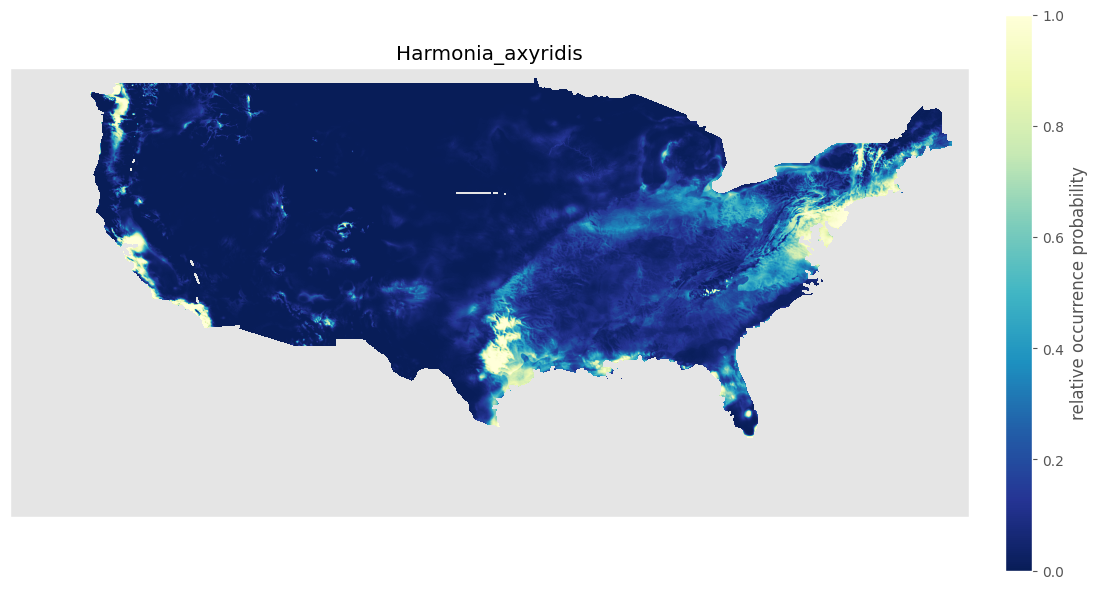

In [ ]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot10 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar10 = plt.colorbar(plot10, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file10 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar10.ax.figure.savefig(colorbar_file10, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_11_Mean_Temperature_of_Coldest_Quarter_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[10], count=10_000)
background.head()

0    POINT (-112.03750 33.96250)
1     POINT (-94.74583 37.79583)
2     POINT (-74.43750 30.07083)
3     POINT (-71.77917 33.72083)
4     POINT (-82.53750 41.69583)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.911


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model11c.ela')

# Write the model predictions to disk
output_raster11 = 'Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster11, quiet=True)

# Read into memory
with rio.open(output_raster11, 'r') as src:
    pred = src.read(1, masked=True)

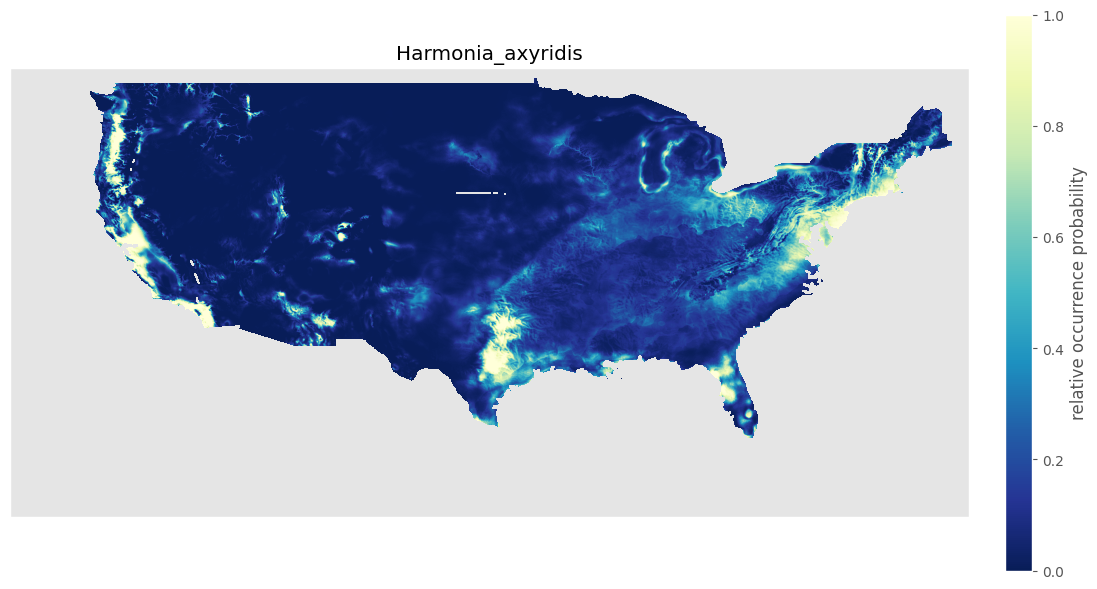

In [ ]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot11 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar11 = plt.colorbar(plot11, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file11 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar11.ax.figure.savefig(colorbar_file11, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_12_Annual_Precipitation_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[11], count=10_000)
background.head()

0     POINT (-79.98750 34.09583)
1    POINT (-124.05417 47.77083)
2     POINT (-94.46250 35.11250)
3     POINT (-91.94583 29.93750)
4    POINT (-103.98750 44.37083)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.905


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model10c.ela')

# Write the model predictions to disk
output_raster12 = 'Annual_Precipitation_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster12, quiet=True)

# Read into memory
with rio.open(output_raster12, 'r') as src:
    pred = src.read(1, masked=True)


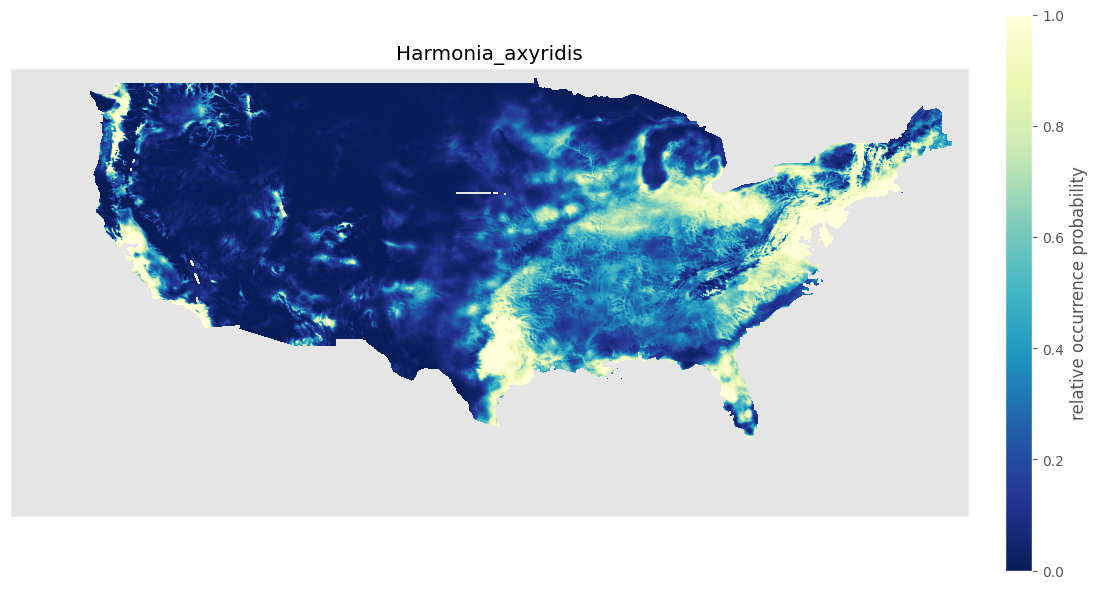

In [ ]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot12 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar12 = plt.colorbar(plot12, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file12 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Annual_Precipitation_Chelsa_Prediction_2011_2040.tif'
cbar12.ax.figure.savefig(colorbar_file12, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_13_Precipitation_of_Wettest_Month_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[12], count=10_000)
background.head()

0    POINT (-111.33750 33.62083)
1     POINT (-88.32917 33.15417)
2    POINT (-114.87917 48.08750)
3    POINT (-105.23750 43.83750)
4    POINT (-119.06250 45.21250)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.906


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model13c.ela')

# Write the model predictions to disk
output_raster13 = 'Precipitation_of_Wettest_Month_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster13, quiet=True)

# Read into memory
with rio.open(output_raster13, 'r') as src:
    pred = src.read(1, masked=True)


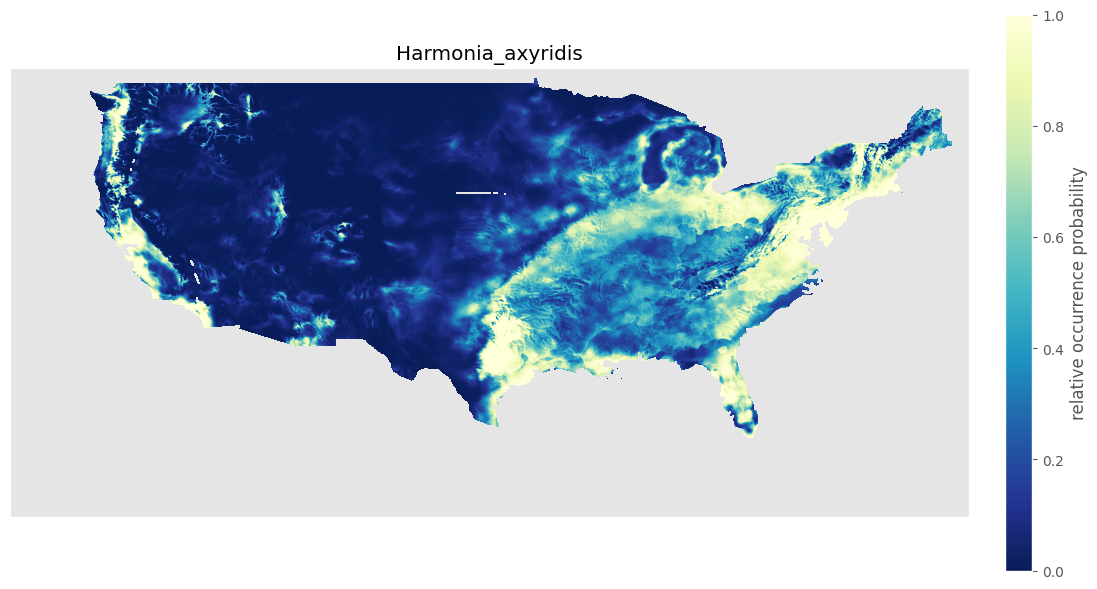

In [ ]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot13 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar13 = plt.colorbar(plot13, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file13 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Precipitation_of_Wettest_Month_Chelsa_Prediction_2011_2040.tif'
cbar1.ax.figure.savefig(colorbar_file13, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_14_Precipitation_of_Driest_Month_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[13], count=10_000)
background.head()

0    POINT (-105.79583 42.62917)
1     POINT (-70.17083 44.62917)
2    POINT (-108.84583 35.64583)
3    POINT (-120.27083 39.58750)
4     POINT (-84.17083 36.74583)
dtype: geometry

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.908


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model14c.ela')

# Write the model predictions to disk
output_raster14 = 'Precipitation_of_Driest_Month_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster14, quiet=True)

# Read into memory
with rio.open(output_raster14, 'r') as src:
    pred = src.read(1, masked=True)


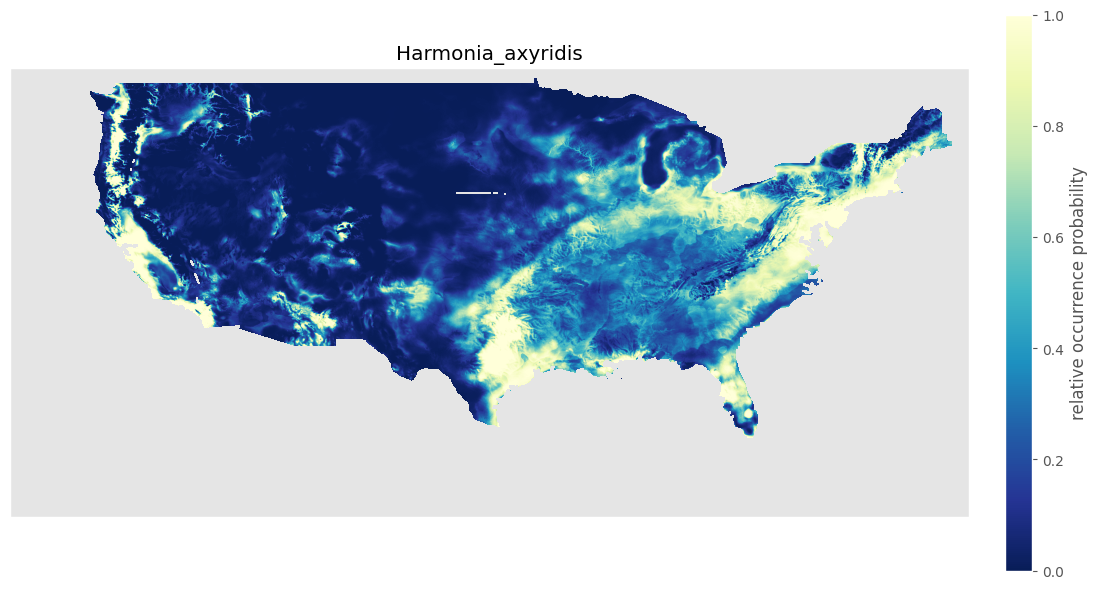

In [ ]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot14 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar14 = plt.colorbar(plot14, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file14 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Precipitation_of_Driest_Month_Chelsa_Prediction_2011_2040.tif'
cbar14.ax.figure.savefig(colorbar_file14, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_15_Precipitation_of_Seasonality_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[14], count=10_000)
background.head()

0    POINT (-129.29583 47.44583)
1    POINT (-100.62917 26.30417)
2    POINT (-128.85417 21.37083)
3    POINT (-126.18750 33.21250)
4    POINT (-111.78750 49.21250)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.912


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model15c.ela')

# write the model predictions to disk
output_raster15 = 'Precipitation_of_Seasonality_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster15, quiet=True)

# Read into memory
with rio.open(output_raster15, 'r') as src:
    pred = src.read(1, masked=True)


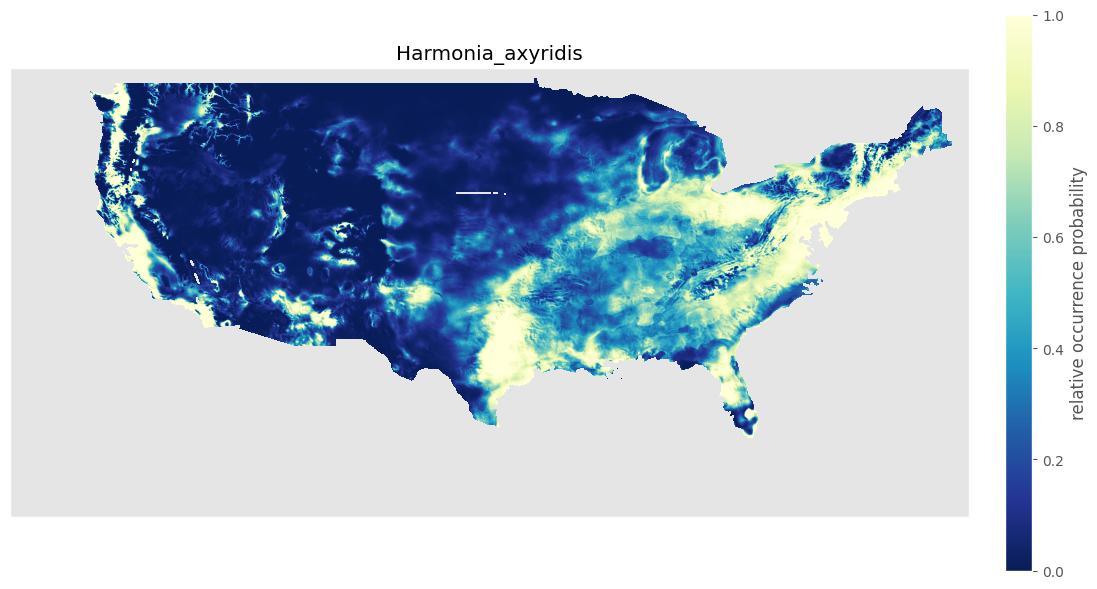

In [ ]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot15 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar15 = plt.colorbar(plot15, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file15 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Precipitation_of_Seasonality_Chelsa_Prediction_2011_2040.tif'
cbar15.ax.figure.savefig(colorbar_file15, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_16_Precipitation_of_Wettest_Quarter_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[15], count=10_000)
background.head()

0     POINT (-90.19583 35.93750)
1     POINT (-91.82083 33.28750)
2    POINT (-111.15417 41.90417)
3    POINT (-103.43750 33.62917)
4     POINT (-75.51250 29.45417)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.918


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model16c.ela')

# Write the model predictions to disk
output_raster16 = 'Precipitation_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster16, quiet=True)

# Read into memory
with rio.open(output_raster16, 'r') as src:
    pred = src.read(1, masked=True)


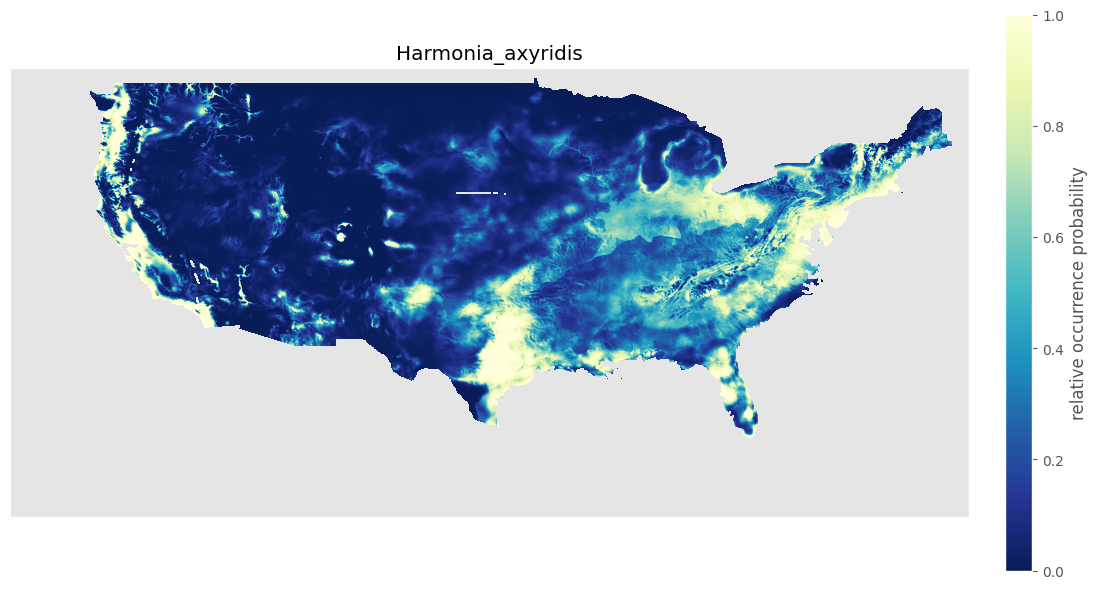

In [ ]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot16 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar16 = plt.colorbar(plot16, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file16 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Precipitation_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar16.ax.figure.savefig(colorbar_file16, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_17_Precipitation_of_Driest_Quarter_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[16], count=10_000)
background.head()

0    POINT (-112.86250 22.33750)
1     POINT (-78.50417 36.26250)
2    POINT (-102.49583 40.71250)
3     POINT (-81.14583 40.03750)
4    POINT (-104.67083 33.60417)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.915


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model17c.ela')

# Write the model predictions to disk
output_raster17 = 'Precipitation_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster17, quiet=True)

# Read into memory
with rio.open(output_raster17, 'r') as src:
    pred = src.read(1, masked=True)


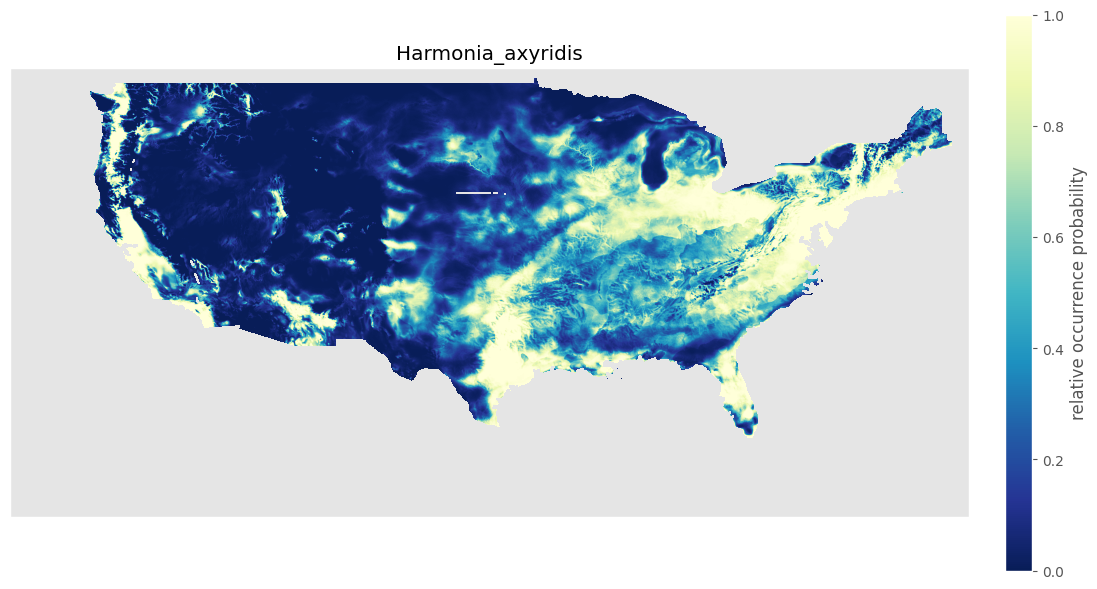

In [ ]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot17 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar17 = plt.colorbar(plot17, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file17 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Precipitation_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar17.ax.figure.savefig(colorbar_file17, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_18_Precipitation_of_Warmest_Quarter_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[17], count=10_000)
background.head()

0    POINT (-114.72083 31.66250)
1    POINT (-129.34583 27.07083)
2     POINT (-76.21250 37.83750)
3    POINT (-122.71250 48.82083)
4     POINT (-96.27083 27.08750)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.912


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model18c.ela')

# Write the model predictions to disk
output_raster18 = 'Precipitation_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster18, quiet=True)

# Read into memory
with rio.open(output_raster18, 'r') as src:
    pred = src.read(1, masked=True)


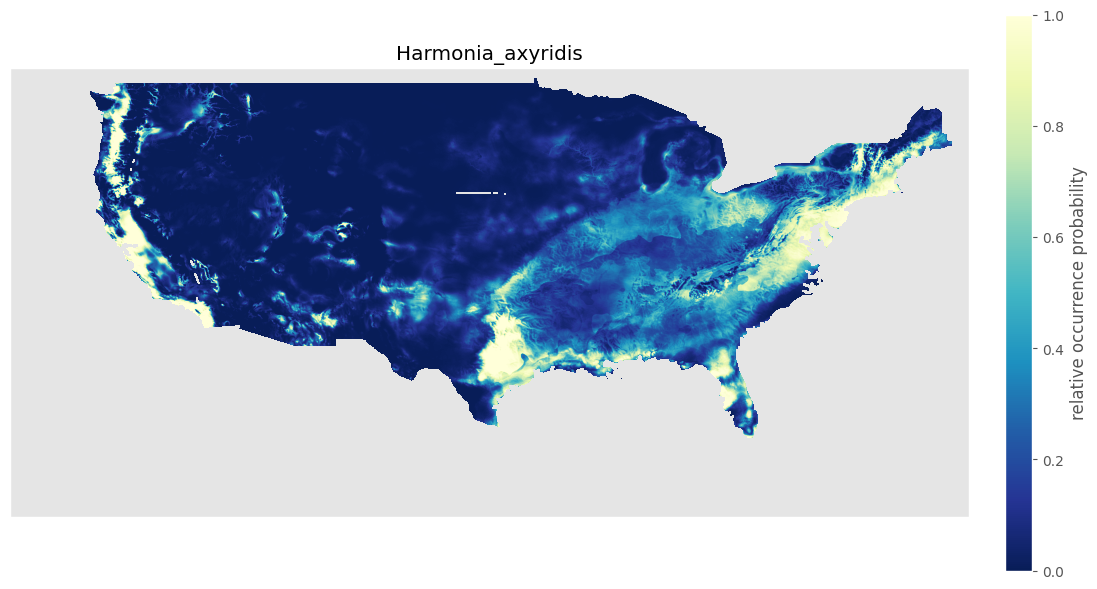

In [ ]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot18 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar18 = plt.colorbar(plot18, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file18 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Precipitation_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar18.ax.figure.savefig(colorbar_file18, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_19_Precipitation_of_Coldest_Quarter_Chelsa_2011_2040.tif

In [13]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[18], count=10_000)
background.head()

0    POINT (-120.12917 48.24583)
1    POINT (-109.70417 24.02083)
2    POINT (-114.77083 44.90417)
3    POINT (-104.44583 42.40417)
4     POINT (-85.63750 36.82917)
dtype: geometry

In [14]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

geometry  class
0   POINT (-83.91289 30.44935)      1
1  POINT (-122.00523 36.97516)      1
2  POINT (-118.39523 34.14359)      1
3  POINT (-122.78149 38.61315)      1
4   POINT (-88.92970 37.37643)      1

In [15]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [16]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [17]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.914


In [18]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model19c.ela')

# Write the model predictions to disk
output_raster19 = 'Precipitation_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif'

#Applies a trained model to a list of raster datasets
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster19, quiet=True)

# Read into memory
with rio.open(output_raster19, 'r') as src:
    pred = src.read(1, masked=True)


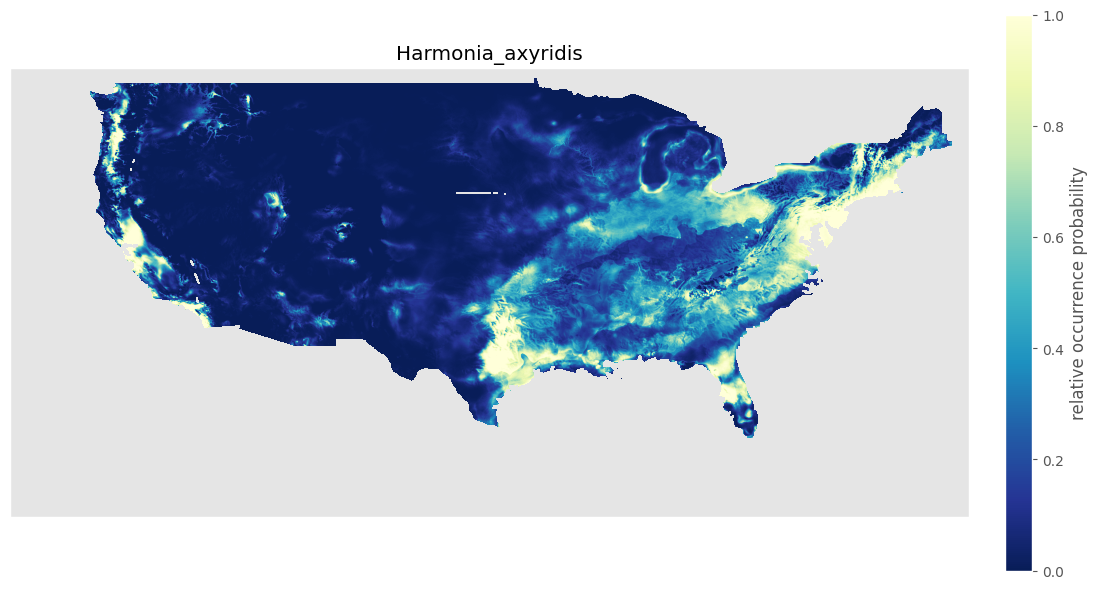

In [19]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot19 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar19 = plt.colorbar(plot19, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [20]:
# Save the colorbar as a TIFF file
colorbar_file19 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Harmonia/Precipitation_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar19.ax.figure.savefig(colorbar_file19, format='tiff')

# Close the figure to free up memory
plt.close(fig)